In [1]:
import sys
sys.path.insert(0,'../tools/DCGAN-tensorflow')

import os
import scipy.misc
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
import tensorflow.contrib.slim as slim

from model import DCGAN
from utils import pp, visualize, to_json, show_all_variables, save_images

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
input_width, input_height = 128, 128
output_width, output_height = 128, 128
batch_size = 64
z_dim = 100
crop = False
dataset_name = 'eyes_collected_128'
checkpoint_dir = '../tools/DCGAN-tensorflow/checkpoints'
data_dir = '../tools/DCGAN-tensorflow/datasets/'
sample_dir = '../tools/DCGAN-tensorflow/samples'

run_config = tf.ConfigProto()
run_config.gpu_options.allow_growth=True

with tf.Session(config=run_config) as sess:
  dcgan = DCGAN(sess,
      input_width=input_width,
      input_height=input_height,
      output_width=output_width,
      output_height=output_height,
      batch_size=batch_size,
      sample_num=batch_size,
      z_dim=z_dim,
      dataset_name=dataset_name,
      input_fname_pattern='*.jpg',
      crop=crop,
      checkpoint_dir=checkpoint_dir,
      data_dir=data_dir,
      sample_dir=sample_dir)

dcgan.load(checkpoint_dir=checkpoint_dir)

('GO data path is ', '../tools/DCGAN-tensorflow/datasets/eyes_collected_128/*.jpg')
 [*] Reading checkpoints...
INFO:tensorflow:Restoring parameters from ../tools/DCGAN-tensorflow/checkpoints/eyes_collected_128_64_128_128/DCGAN.model-15502
 [*] Success to read DCGAN.model-15502


(True, 15502)

In [8]:
def sample_progression(dcgan, n):
    z1 = np.random.uniform(-1, 1, size=(dcgan.z_dim))
    samples = []
    for i in range(n):
        z2 = np.random.uniform(-1, 1, size=(dcgan.z_dim))
        zs = np.array([ (1.0-t)*z1 + t*z2  for t in np.linspace(0, 1, dcgan.batch_size)])
        samples.append(sess.run(dcgan.sampler, feed_dict={dcgan.z: zs}))
        z1 = z2
    samples = [s for segment in samples for s in segment]
    return samples    

def inverse_transform(x):
    return (x + 1.0) / 2.0
    
def display(sample):
    s = inverse_transform(sample)
    s = np.array(255.0*s).astype(np.uint8)
    plt.imshow(s, interpolation='nearest')
    plt.show()


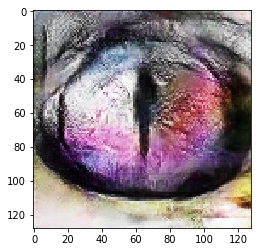

In [9]:

# one way to make z_sample, interpolate between two endpoints
z1 = np.random.uniform(-1, 1, size=(dcgan.z_dim))
z2 = np.random.uniform(-1, 1, size=(dcgan.z_dim))
z_sample = np.array([ (1.0-t)*z1 + t*z2  for t in np.linspace(0, 1, batch_size)])


# sample_progression will do the above N times (e.g. N=12, as in below) 
samples = sample_progression(dcgan, 12)

# you can display the first image
display(samples[0])


In [5]:
import moviepy.editor as mpy

def make_frame(t):
    nf, fps = 768, 30
    x = samples[int(min(nf-1, fps*t))]
    return ((x+1.)/2.*255).astype(np.uint8)

clip = mpy.VideoClip(make_frame, duration=25.6)
clip.write_videofile('test_eyes.mp4', fps=30)

[MoviePy] >>>> Building video test_eyes.mp4
[MoviePy] Writing video test_eyes.mp4


100%|█████████▉| 768/769 [00:00<00:00, 1494.62it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: test_eyes.mp4 

